In [8]:
import pandas as pd
import numpy as np 
df = pd.read_csv('rentprediction_dataset_v5.csv')
print(df.columns.to_list())

['rent', 'age', 'sqmtr', 'newbuild', 'rooms', 'elabel', 'parking', 'bedrooms', 'bathrooms', 'floor', 'garden', 'balcony', 'rooftop', 'apartment', 'duplexmulti', 'luxury', 'singlefam', 'houseboat', 'pc4', 'percnative_pc4', 'sizehoudehold_pc4', 'percpropertyown_pc4', 'taxablepropertyvaluation', 'populationdensity_pc4', 'latitude', 'longitude', 'eucl_dist_to_Amstelland', 'eucl_dist_to_Amstelpark', 'eucl_dist_to_Amsterdamse Bos', 'eucl_dist_to_Beatrixpark', 'eucl_dist_to_Brasapark', 'eucl_dist_to_De Bretten', 'eucl_dist_to_Diemerpark', 'eucl_dist_to_Erasmuspark', 'eucl_dist_to_Flevopark', 'eucl_dist_to_Gaasperplas', 'eucl_dist_to_Gijsbrecht van Aemstelpark', 'eucl_dist_to_Houthavenpark', 'eucl_dist_to_Martin Luther Kingpark', 'eucl_dist_to_Nelson Mandelapark', 'eucl_dist_to_Noorder IJplas', 'eucl_dist_to_Noorderpark', 'eucl_dist_to_Oeverlanden', 'eucl_dist_to_Oosterpark', 'eucl_dist_to_Park Frankendael', 'eucl_dist_to_Park Schinkeleilanden', 'eucl_dist_to_Park Somerlust', 'eucl_dist_to_Rem

In [9]:
#apply best transformation based on training set to the whole dataset and then split the daaset.
best_transformation = {'rent': 'log', 'age': 'log', 'sqmtr': 'sqrt', 'newbuild': 'none', 'rooms': 'none', 'elabel': 'log', 'parking': 'none', 'bedrooms': 'none', 'bathrooms': 'square', 'floor': 'log', 'garden': 'none', 'balcony': 'none', 'rooftop': 'none', 'apartment': 'none', 'duplexmulti': 'none', 'luxury': 'none', 'singlefam': 'none', 'houseboat': 'none', 'pc4': 'square', 'percnative_pc4': 'inverse', 'sizehoudehold_pc4': 'inverse', 'percpropertyown_pc4': 'sqrt', 'taxablepropertyvaluation': 'log', 'populationdensity_pc4': 'sqrt', 'latitude': 'square', 'longitude': 'inverse', 'eucl_dist_to_Amstelland': 'inverse', 'eucl_dist_to_Amstelpark': 'inverse', 'eucl_dist_to_Amsterdamse Bos': 'sqrt', 'eucl_dist_to_Beatrixpark': 'sqrt', 'eucl_dist_to_Brasapark': 'square', 'eucl_dist_to_De Bretten': 'sqrt', 'eucl_dist_to_Diemerpark': 'square', 'eucl_dist_to_Erasmuspark': 'square', 'eucl_dist_to_Flevopark': 'square', 'eucl_dist_to_Gaasperplas': 'square', 'eucl_dist_to_Gijsbrecht van Aemstelpark': 'sqrt', 'eucl_dist_to_Houthavenpark': 'inverse', 'eucl_dist_to_Martin Luther Kingpark': 'exp', 'eucl_dist_to_Nelson Mandelapark': 'square', 'eucl_dist_to_Noorder IJplas': 'sqrt', 'eucl_dist_to_Noorderpark': 'square', 'eucl_dist_to_Oeverlanden': 'square', 'eucl_dist_to_Oosterpark': 'square', 'eucl_dist_to_Park Frankendael': 'square', 'eucl_dist_to_Park Schinkeleilanden': 'sqrt', 'eucl_dist_to_Park Somerlust': 'exp', 'eucl_dist_to_Rembrandtpark': 'square', 'eucl_dist_to_Sarphatipark': 'inverse', 'eucl_dist_to_Schellingwouderbreek': 'square', 'eucl_dist_to_Sloterpark': 'sqrt', 'eucl_dist_to_Strand IJburg': 'square', 'eucl_dist_to_Tuinen van West': 'sqrt', 'eucl_dist_to_Vliegenbos': 'square', 'eucl_dist_to_Volgermeer': 'square', 'eucl_dist_to_Vondelpark': 'sqrt', 'eucl_dist_to_Wertheimpark': 'inverse', 'eucl_dist_to_Westerpark': 'inverse', 'eucl_dist_to_Nieuwezijds Kolk': 'sqrt', 'eucl_dist_to_Surinameplein / Curaçaostraat': 'sqrt', 'eucl_dist_to_Johan Huizingalaan': 'square', 'eucl_dist_to_Prinsengracht': 'inverse', 'eucl_dist_to_Keizergracht': 'sqrt', 'eucl_dist_to_Koningsplein': 'sqrt', 'eucl_dist_to_Matterhorn': 'sqrt', 'eucl_dist_to_Pilatus': 'sqrt', 'eucl_dist_to_Inarisstraat': 'sqrt', 'eucl_dist_to_Baden Powellweg': 'sqrt', 'eucl_dist_to_Hoekenes': 'sqrt', 'eucl_dist_to_Louis Davidsstraat': 'square', 'eucl_dist_to_Eerste Constantijn Huygensstraat / Overtoom': 'sqrt', 'eucl_dist_to_Rhijnvis Feithstraat': 'sqrt', 'eucl_dist_to_Kruislaan': 'square', 'eucl_dist_to_Brinkstraat': 'square', 'eucl_dist_to_Arent Krijtstraat': 'square', 'eucl_dist_to_Diemerbrug': 'square', 'eucl_dist_to_Diemen Sniep': 'square', 'eucl_dist_to_Dapperstraat': 'square', 'eucl_dist_to_Meer en Vaart': 'square', 'eucl_dist_to_Derkinderenstraat': 'square', 'eucl_dist_to_Corantijnstraat': 'sqrt', 'eucl_dist_to_Postjesweg / Hoofdweg': 'exp', 'eucl_dist_to_Ten Katestraat': 'sqrt', 'eucl_dist_to_Kinkerstraat / Bilderdijkstraat': 'sqrt', 'eucl_dist_to_Leidseplein': 'sqrt', 'eucl_dist_to_Ecuplein': 'sqrt', 'eucl_dist_to_J.P. Heijestraat': 'sqrt', 'eucl_dist_to_Van Hallstraat': 'sqrt', 'eucl_dist_to_Nieuwe Willemsstraat': 'sqrt', 'eucl_dist_to_Azartplein': 'square', 'eucl_dist_to_Plein `40-`45': 'sqrt', 'eucl_dist_to_Van Limburg Stirumstraat': 'sqrt', 'eucl_dist_to_Eerste Coehoornstraat': 'square', 'eucl_dist_to_C. van Eesterenlaan': 'square', 'eucl_dist_to_K. `s-Gravesandestraat': 'exp', 'eucl_dist_to_Vijzelgracht /Weteringcircuit': 'sqrt', 'eucl_dist_to_Rijksmuseum': 'sqrt', 'eucl_dist_to_Haarlemmerplein': 'sqrt', 'eucl_dist_to_De Wittenkade': 'sqrt', 'eucl_dist_to_Nassaukade': 'sqrt', 'eucl_dist_to_Alexanderplein': 'square', 'eucl_dist_to_Hoogte Kadijk': 'square', 'eucl_dist_to_Eerste Leeghwaterstraat': 'square', 'eucl_dist_to_Rietlandpark': 'square', 'eucl_dist_to_Willem de Zwijerlaan': 'sqrt', 'eucl_dist_to_De Pijp': 'sqrt', 'eucl_dist_to_Wiltzanghlaan': 'square', 'eucl_dist_to_Molenwerf': 'sqrt', 'eucl_dist_to_Europaplein': 'inverse', 'eucl_dist_to_Waalstraat': 'inverse', 'eucl_dist_to_Maasstraat': 'inverse', 'eucl_dist_to_Dintelstraat': 'inverse', 'eucl_dist_to_Amstelveen Stadshart': 'sqrt', 'eucl_dist_to_Marco Polostraat': 'square', 'eucl_dist_to_Jan van Galenstraat': 'square', 'eucl_dist_to_Rozengracht / Marnixstraat': 'sqrt', 'eucl_dist_to_Roelof Hartplein': 'sqrt', 'eucl_dist_to_Bos en Lommerweg': 'square', 'eucl_dist_to_Cornelis Troostplein / Van Hillegaertstraat': 'sqrt', 'eucl_dist_to_Dam / Paleisstraat': 'sqrt', 'eucl_dist_to_Burg. Van Leeuwenlaan': 'sqrt', 'eucl_dist_to_Burg. Fockstraat': 'sqrt', 'eucl_dist_to_Burg.Eliasstraat': 'sqrt', 'eucl_dist_to_Burg. Rendorpstraat': 'sqrt', 'eucl_dist_to_Admiraal Helfrichstraat': 'square', 'eucl_dist_to_Dr. H. Colijnstraat': 'sqrt', 'eucl_dist_to_Lambertus Zijlplein': 'sqrt', 'eucl_dist_to_Mercatorplein': 'square', 'eucl_dist_to_Jan Voermanstraat': 'square', 'eucl_dist_to_Rembrandtplein': 'inverse', 'eucl_dist_to_Artis': 'log', 'eucl_dist_to_Burg. Röellstraat / Slotermerlaan': 'sqrt', 'eucl_dist_to_Mr. Visserplein': 'inverse', 'eucl_dist_to_Eerste Van Swindenstraat': 'square', 'eucl_dist_to_Linnaeusstraat / Wijttenbachstraat': 'square', 'eucl_dist_to_Insulindeweg': 'square', 'eucl_dist_to_Jan Tooropstraat': 'square', 'eucl_dist_to_Bos en Lommerplein': 'square', 'eucl_dist_to_Soembawastraat': 'square', 'eucl_dist_to_Molukkenstraat': 'square', 'eucl_dist_to_Hogeweg': 'square', 'eucl_dist_to_Hugo de Vrieslaan': 'square', 'eucl_dist_to_Pontanusstraat': 'square', 'eucl_dist_to_Zeeburgerdijk': 'square', 'eucl_dist_to_Javaplein': 'square', 'eucl_dist_to_Dam': 'sqrt', 'eucl_dist_to_Rokin': 'sqrt', 'eucl_dist_to_Marie Heinekenplein': 'sqrt', 'eucl_dist_to_IJsbaanpad': 'sqrt', 'eucl_dist_to_Concertgebouw': 'sqrt', 'eucl_dist_to_Dijkgraafplein': 'sqrt', 'eucl_dist_to_Osdorpplein West': 'sqrt', 'eucl_dist_to_Osdorpplein Oost': 'sqrt', 'eucl_dist_to_Elandsgracht': 'sqrt', 'eucl_dist_to_De Clercqstraat / Bilderdijkstraat': 'sqrt', 'eucl_dist_to_Amstelveenseweg': 'sqrt', 'eucl_dist_to_Westlandgracht': 'square', 'eucl_dist_to_Laan van Vlaanderen': 'square', 'eucl_dist_to_Centrum Nieuw Sloten': 'square', 'eucl_dist_to_Oudenaardeplantsoen': 'square', 'eucl_dist_to_Cornelis Schuytstraat': 'sqrt', 'eucl_dist_to_Valeriusplein': 'sqrt', 'eucl_dist_to_Delflandlaan': 'square', 'eucl_dist_to_Louwesweg': 'square', 'eucl_dist_to_Hoofddorpplein': 'sqrt', 'eucl_dist_to_Van Baerlestraat': 'sqrt', 'eucl_dist_to_Prinses Irenestraat': 'sqrt', 'eucl_dist_to_Stadionweg / Beethovenstraat': 'sqrt', 'eucl_dist_to_Minervaplein': 'sqrt', 'eucl_dist_to_IJburg': 'square', 'eucl_dist_to_Oostpoort': 'square', 'eucl_dist_to_Muziekgebouw Bimhuis': 'exp', 'eucl_dist_to_Kattenburgerstraat': 'square', 'eucl_dist_to_Zuiderzeeweg': 'square', 'eucl_dist_to_Steigereiland': 'square', 'eucl_dist_to_Vennepluimstraat': 'square', 'eucl_dist_to_Diemerparklaan': 'square', 'eucl_dist_to_Lumièrestraat': 'square', 'eucl_dist_to_Zoutkeetsgracht': 'sqrt', 'eucl_dist_to_Beukenweg': 'exp', 'eucl_dist_to_Marnixplein': 'sqrt', 'eucl_dist_to_Victorieplein': 'inverse', 'eucl_dist_to_Wibautstraat': 'none', 'eucl_dist_to_Lutmastraat': 'inverse', 'eucl_dist_to_Amsteldijk': 'none', 'eucl_dist_to_Muiderpoortstation': 'square', 'eucl_dist_to_Fredrik Hendrikplantsoen': 'sqrt', 'eucl_dist_to_Amstelkade': 'inverse', 'eucl_dist_to_Camperstraat': 'exp', 'eucl_dist_to_Van Woustraat / Ceintuurbaan': 'inverse', 'eucl_dist_to_Tweede Van der Helststraat': 'inverse', 'eucl_dist_to_Keizersgracht': 'inverse', 'eucl_dist_to_Frederiksplein / Stadhouderskade': 'inverse', 'eucl_dist_to_Station Zuid': 'sqrt', 'eucl_dist_to_A.J. Ernststraat': 'sqrt', 'eucl_dist_to_Parnassusweg': 'sqrt', 'eucl_dist_to_Uilenstede': 'inverse', 'eucl_dist_to_Olympisch Stadion': 'sqrt', 'eucl_dist_to_Zonnestein': 'inverse', 'eucl_dist_to_Onderuit': 'inverse', 'eucl_dist_to_Station Lelylaan': 'square', 'eucl_dist_to_Isolatorweg': 'sqrt', 'eucl_dist_to_Gein': 'square', 'eucl_dist_to_Overamstel': 'exp', 'eucl_dist_to_Reigersbos': 'square', 'eucl_dist_to_Station Sloterdijk': 'sqrt', 'eucl_dist_to_Burg. De Vlugtlaan': 'sqrt', 'eucl_dist_to_Henk Sneevlietweg': 'square', 'eucl_dist_to_Heemstedestraat': 'square', 'eucl_dist_to_Postjesweg': 'square', 'eucl_dist_to_Station RAI': 'inverse', 'eucl_dist_to_Strandvliet': 'square', 'eucl_dist_to_Station Bijlmer ArenA': 'square', 'eucl_dist_to_Bullewijk': 'square', 'eucl_dist_to_Station Holendrecht': 'square', 'eucl_dist_to_Station Duivendrecht': 'square', 'eucl_dist_to_De Boelelaan/VU': 'sqrt', 'eucl_dist_to_Van Boshuizenstraat': 'sqrt', 'eucl_dist_to_Spaklerweg': 'square', 'eucl_dist_to_Centraal Station': 'inverse', 'eucl_dist_to_Waterlooplein': 'inverse', 'eucl_dist_to_Weesperplein': 'inverse', 'eucl_dist_to_Olympiaweg': 'sqrt', 'eucl_dist_to_Olympiaplein': 'sqrt', 'eucl_dist_to_Gerrit van der Veenstraat': 'sqrt', 'eucl_dist_to_Nieuwmarkt': 'inverse', 'eucl_dist_to_Amstelstation': 'exp', 'eucl_dist_to_Van der Madeweg': 'square', 'eucl_dist_to_Verrijn Stuartweg': 'square', 'eucl_dist_to_Station Ganzenhoef': 'square', 'eucl_dist_to_Kraaiennest station': 'square', 'eucl_dist_to_Venserpolder': 'square', 'eucl_dist_to_Witte de Withstraat': 'sqrt', 'eucl_dist_to_Willem Schoutenstraat': 'square', 'eucl_dist_to_Admiraal De Ruijterweg': 'sqrt', 'eucl_dist_to_Station Sloterdijjk': 'sqrt', 'eucl_dist_to_Station Diemen-Zuid': 'square', 'eucl_dist_to_Bob Haarmslaan': 'square', 'eucl_dist_to_Westermarkt': 'sqrt', 'eucl_dist_to_Noord': 'square', 'eucl_dist_to_Vijzelgracht': 'sqrt', 'eucl_dist_to_Museumplein': 'sqrt', 'eucl_dist_to_Hugo de Grootplein': 'sqrt', 'eucl_dist_to_Drenthepark': 'inverse', 'eucl_dist_to_Bloemgracht': 'sqrt', 'eucl_dist_to_De Rijpstraat': 'square', 'eucl_dist_to_VUmc': 'sqrt', 'eucl_dist_to_Kronenburg': 'inverse', 'eucl_dist_to_Oranjebaan': 'inverse', 'eucl_dist_to_Eerste Marnixdwarsstraat': 'sqrt', 'eucl_dist_to_Plantage Lepellaan': 'exp', 'eucl_dist_to_Ouderkerkslaan': 'inverse', 'eucl_dist_to_Sportlaan': 'sqrt', 'eucl_dist_to_Meent': 'sqrt', 'eucl_dist_to_Brink': 'sqrt', 'eucl_dist_to_Poortwachter': 'sqrt', 'eucl_dist_to_Sacharovlaan': 'sqrt', 'eucl_dist_to_Westwijk': 'sqrt', 'eucl_dist_to_Station Amsterdam Muiderpoort': 'square', 'eucl_dist_to_Station Amsterdam Amstel': 'exp', 'eucl_dist_to_Station Amsterdam Science Park': 'square', 'eucl_dist_to_Station Amsterdam Sloterdijk': 'sqrt', 'eucl_dist_to_Station Amsterdam Lelylaan': 'square', 'eucl_dist_to_Station RAI Amsterdam': 'sqrt', 'eucl_dist_to_Station Amsterdam Zuid/WTC': 'sqrt', 'eucl_dist_to_Station Amsterdam Bijlmer': 'square', 'eucl_dist_to_Station Amsterdam Holendrecht': 'square', 'eucl_dist_to_Station Weesp': 'square', 'eucl_dist_to_Station Amsterdam Centraal': 'inverse', 'eucl_dist_to_nearest_park': 'inverse', 'eucl_dist_to_nearest_train_station': 'sqrt', 'eucl_dist_to_nearest_tramsubway': 'sqrt'}

def log_transform(x):
    return np.log(x + 1)  # Add 1 to avoid log(0)

def sqrt_transform(x):
    return np.sqrt(x)

def inverse_transform(x):
    return 1 / (x + 1)  # Avoid division by zero

def square_transform(x):
    return np.square(x)

def exp_transform(x):
    return np.exp(np.clip(x, None, 20))  # Clip to avoid very large values

# List of transformations
transformations = {
    'none': lambda x: x,
    'log': log_transform,
    'sqrt': sqrt_transform,
    'inverse': inverse_transform,
    'square': square_transform,
    'exp': exp_transform
}

def transform_dataframe(df, best_transformations):
    transformed_df = pd.DataFrame()
    for column in df.columns:
        best_transformation = best_transformations[column]
        if best_transformation == 'none':
            transformed_df[column] = df[column]
        else:
            transformed_df[f'{column}_{best_transformation}'] = transformations[best_transformation](df[column])
    
    transformed_columns = [f'{column}_{best_transformations[column]}' if best_transformations[column] != 'none' else column for column in df.columns]
    return transformed_df[transformed_columns]

df_transformed = transform_dataframe(df, best_transformation)

df_transformed.head()

/tmp/ipykernel_143051/426146930.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed_df[f'{column}_{best_transformation}'] = transformations[best_transformation](df[column])
/tmp/ipykernel_143051/426146930.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed_df[f'{column}_{best_transformation}'] = transformations[best_transformation](df[column])
/tmp/ipykernel_143051/426146930.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

,rent_log,age_log,sqmtr_sqrt,newbuild,rooms,elabel_log,parking,bedrooms,bathrooms_square,floor_log,...,eucl_dist_to_Station Amsterdam Lelylaan_square,eucl_dist_to_Station RAI Amsterdam_sqrt,eucl_dist_to_Station Amsterdam Zuid/WTC_sqrt,eucl_dist_to_Station Amsterdam Bijlmer_square,eucl_dist_to_Station Amsterdam Holendrecht_square,eucl_dist_to_Station Weesp_square,eucl_dist_to_Station Amsterdam Centraal_inverse,eucl_dist_to_nearest_park_inverse,eucl_dist_to_nearest_train_station_sqrt,eucl_dist_to_nearest_tramsubway_sqrt
0,6.952729,0.000000,6.633250,1.0,2.0,1.620430,0.0,1.0,2.097516,0.693147,...,0.000013,0.235172,0.200337,0.014010,0.018520,0.044701,0.937122,0.987651,0.059524,0.055331
1,6.974479,1.098612,6.633250,1.0,1.0,1.945910,0.0,1.0,2.180321,1.386294,...,0.029053,0.340968,0.363124,0.005035,0.005100,0.003319,0.903515,0.989395,0.236917,0.055557
2,7.003065,0.000000,7.071068,1.0,2.0,1.594071,0.0,1.0,1.339776,1.280500,...,0.001130,0.241667,0.222111,0.013813,0.018673,0.041188,0.955572,0.988753,0.130116,0.060760
3,7.006695,1.098612,6.633250,1.0,1.0,1.945910,0.0,1.0,2.179334,1.791759,...,0.029045,0.340937,0.363095,0.005033,0.005100,0.003322,0.903535,0.989378,0.236870,0.055656
4,7.008505,0.000000,7.483315,1.0,2.0,1.618338,0.0,1.0,2.104449,0.693147,...,0.000007,0.236969,0.202431,0.014212,0.018750,0.045058,0.936541,0.987163,0.051916,0.049026


In [10]:
#split the transformed dataframe
from sklearn.model_selection import train_test_split

y = df_transformed['rent_log']
X = df_transformed.drop(columns={'rent_log'})

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.177, random_state=42)

In [11]:
#we saw before that 3 components explain 95% of the variance, so that is what we'll use
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Standardize the location variables
location_columns = [col for col in X_train.columns if col.startswith('eucl_dist_to_')]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[location_columns])
X_val_scaled = scaler.transform(X_val[location_columns])
X_test_scaled = scaler.transform(X_test[location_columns])

# Apply PCA with 3 components and is only fitted using the training set, and not the validation or test set
n_components = 3
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Combine PCA components with the original non-location features
non_location_columns = [col for col in X_train.columns if not col.startswith('eucl_dist_to_')]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'pc_{i+1}' for i in range(n_components)])
X_val_pca_df = pd.DataFrame(X_val_pca, columns=[f'pc_{i+1}' for i in range(n_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'pc_{i+1}' for i in range(n_components)])

X_train_final = pd.concat([X_train[non_location_columns].reset_index(drop=True), X_train_pca_df], axis=1)
X_val_final = pd.concat([X_val[non_location_columns].reset_index(drop=True), X_val_pca_df], axis=1)
X_test_final = pd.concat([X_test[non_location_columns].reset_index(drop=True), X_test_pca_df], axis=1)

print(X_train_final.head())
print(X_val_final.head())
print(X_test_final.head())

# Fit the Linear Regression model with the reduced dataset
reg = LinearRegression().fit(X_train_final, y_train)

# Predict on the validation data
y_val_pred = reg.predict(X_val_final)

# Evaluate the model performance
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

print("\nPerformance Metrics on Validation Set:")
print(f"  MSE: {mse_val}")
print(f"  R2: {r2_val}")
print(f"  MAPE: {mape_val}")

# Predict on the training data
y_train_pred = reg.predict(X_train_final)

# Evaluate the model performance on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

print("\nPerformance Metrics on Training Set:")
print(f"  MSE: {mse_train}")
print(f"  R2: {r2_train}")
print(f"  MAPE: {mape_train}")


    age_log  sqmtr_sqrt  newbuild  rooms  elabel_log  parking  bedrooms  \
0  2.639057    7.416198       0.0    2.0    1.609438      0.0  1.000000   
1  4.779123   12.206556       0.0    4.0    1.918289      0.0  3.000000   
2  0.000000    8.366600       1.0    1.0    1.791759      0.0  1.455901   
3  0.000000    8.000000       1.0    3.0    1.791759      0.0  2.000000   
4  1.386294    8.185353       0.0    3.0    2.079442      0.0  2.000000   

   bathrooms_square  floor_log  garden  ...  percnative_pc4_inverse  \
0          2.250000   1.386294     0.0  ...                0.666667   
1          2.250000   1.386294     0.0  ...                0.666667   
2          2.812517   2.833213     0.0  ...                0.833333   
3          2.815238   2.302585     0.0  ...                0.833333   
4          2.250000   1.609438     0.0  ...                0.666667   

   sizehoudehold_pc4_inverse  percpropertyown_pc4_sqrt  \
0                   0.400000                  0.547723   
1     

In [12]:
print(X_train_final.columns.to_list())

['age_log', 'sqmtr_sqrt', 'newbuild', 'rooms', 'elabel_log', 'parking', 'bedrooms', 'bathrooms_square', 'floor_log', 'garden', 'balcony', 'rooftop', 'apartment', 'duplexmulti', 'luxury', 'singlefam', 'houseboat', 'pc4_square', 'percnative_pc4_inverse', 'sizehoudehold_pc4_inverse', 'percpropertyown_pc4_sqrt', 'taxablepropertyvaluation_log', 'populationdensity_pc4_sqrt', 'latitude_square', 'longitude_inverse', 'pc_1', 'pc_2', 'pc_3']


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train_final, y_train)

LinearRegression()

In [27]:
y_val_prediction = regr.predict(X_val_final)

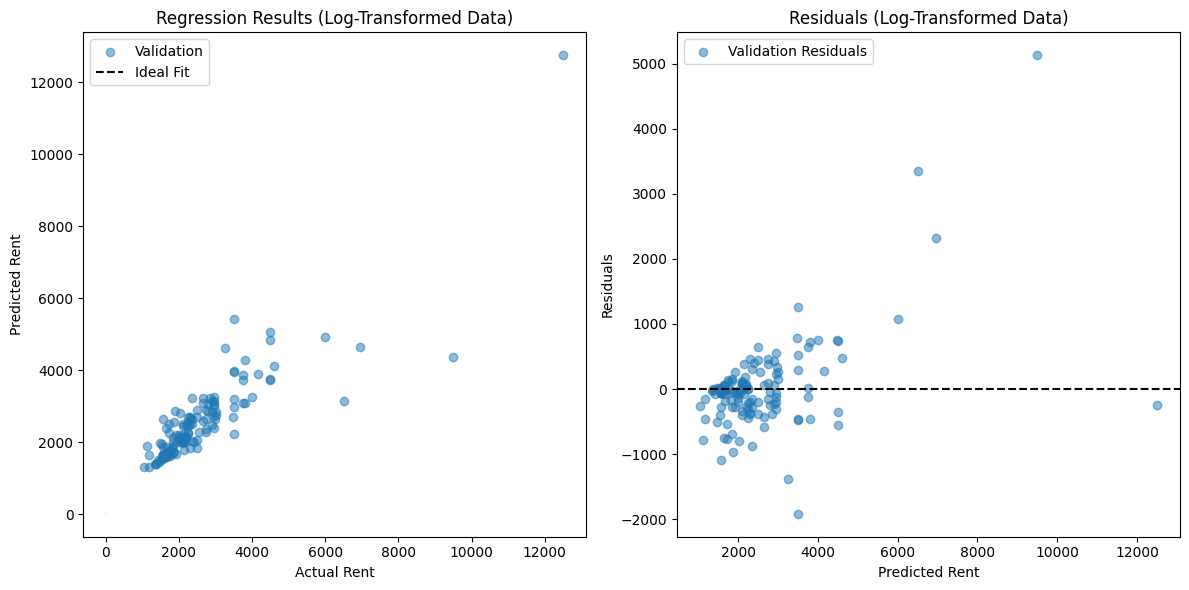

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(np.exp(y_val), np.exp(y_val_prediction), alpha=0.5, label='Validation')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='black', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Regression Results (Log-Transformed Data)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(np.exp(y_val), np.exp(y_val) - np.exp(y_val_prediction), alpha=0.5, label='Validation Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Rent')
plt.ylabel('Residuals')
plt.title('Residuals (Log-Transformed Data)')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Function to count outliers based on IQR
def count_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    return outliers

# Count outliers in X_train
outliers = count_outliers_iqr(X_train_final)
outliers_df = pd.DataFrame(list(outliers.items()), columns=['Variable', 'Number of Outliers'])

# Display the outliers count
print(outliers_df)

                        Variable  Number of Outliers
0                        age_log                   0
1                     sqmtr_sqrt                  27
2                       newbuild                   0
3                          rooms                  25
4                     elabel_log                   0
5                        parking                  53
6                       bedrooms                  38
7               bathrooms_square                 162
8                      floor_log                   2
9                         garden                  74
10                       balcony                 118
11                       rooftop                  43
12                     apartment                 102
13                   duplexmulti                   9
14                        luxury                   7
15                     singlefam                  25
16                     houseboat                   0
17                    pc4_square              

Linear Regression MSE: 0.030719537568803672
Random Forest Regressor MSE: 0.02812925793701895


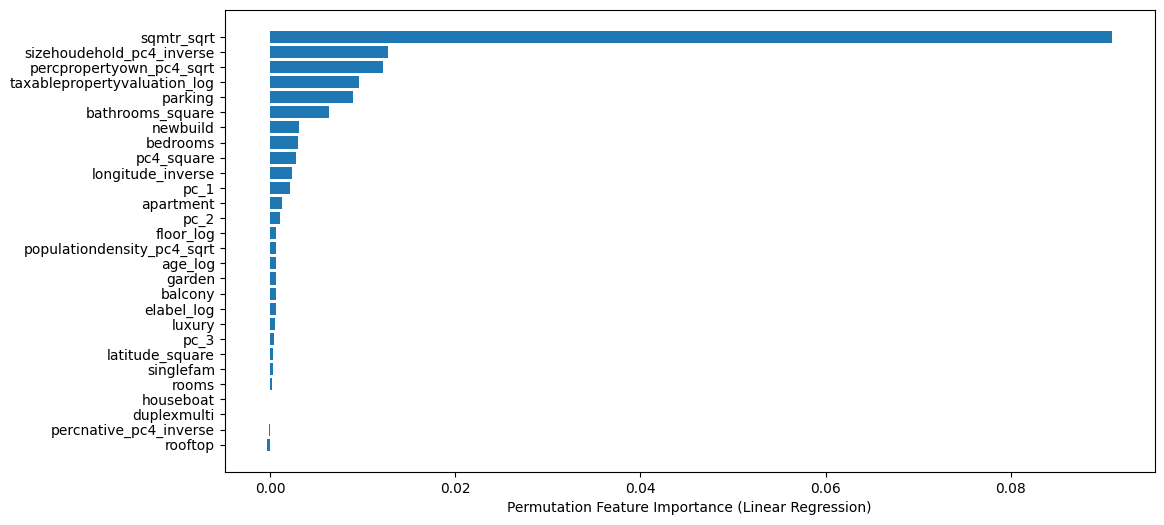

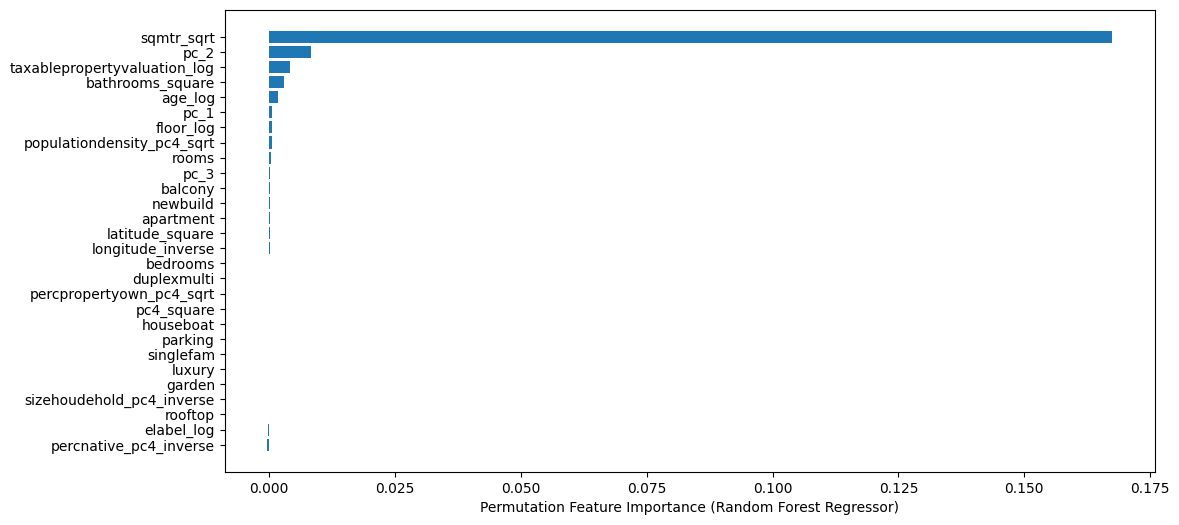

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Train a Linear Regression model
reg = LinearRegression().fit(X_train_final, y_train)
y_pred = reg.predict(X_test_final)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

# Train a Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_final, y_train)
y_pred_rfr = rfr.predict(X_test_final)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print(f"Random Forest Regressor MSE: {mse_rfr}")

# Permutation Feature Importance for Linear Regression
result = permutation_importance(reg, X_test_final, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_test_final.columns[i] for i in sorted_idx])
plt.xlabel("Permutation Feature Importance (Linear Regression)")
plt.show()

# Permutation Feature Importance for Random Forest Regressor
result_rfr = permutation_importance(rfr, X_test_final, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
sorted_idx_rfr = result_rfr.importances_mean.argsort()

plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_rfr)), result_rfr.importances_mean[sorted_idx_rfr], align='center')
plt.yticks(range(len(sorted_idx_rfr)), [X_test_final.columns[i] for i in sorted_idx_rfr])
plt.xlabel("Permutation Feature Importance (Random Forest Regressor)")
plt.show()